<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Frequency of a colunms, all labels, unik features

---



In [ ]:
unik_feat=list(dataset["Sleep_Stage"].unique())
all_feat_list=dataset["Sleep_Stage"].values
frequency = dataset["Sleep_Stage"].value_counts()

print(frequency)
print(unik_feat)
print(all_feat_list)

NREM    72631
REM     16465
Name: Sleep_Stage, dtype: int64
['NREM', 'REM']
['NREM' 'NREM' 'NREM' ... 'NREM' 'NREM' 'NREM']




---



#ALL FUNCTIONS

---



##Important Functions

In [ ]:
!pip install imbalanced-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from google.colab import files
import joblib
from sklearn.preprocessing import LabelEncoder

def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data





#over-sampling. returns a dataset
def os_dataset_balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

#over-sampling. returns x and y
def os_Xy_balance(X_temp, y_temp):
  smote = SMOTE()
  return smote.fit_resample(X_temp, y_temp)


#Under-sampling. return a dataset
def us_dataset_balance(X_temp, y_temp):
  rus = RandomUnderSampler()
  X_temp, y_temp= rus.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

#Under-sampling. returns x and y
def us_Xy_balance(X_temp, y_temp):
  rus = RandomUnderSampler()
  return rus.fit_resample(X_train, y_train)





def save_model(model,model_name):
 joblib.dump(model, model_name)

def load_model(model_name):
  return joblib.load(model_name)



def Search_Null(dataset):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == 'nan':
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic



def Search_Some(dataset,some):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic


"""def divide_dataset(dataset,percentage,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    return dataset.iloc[:int(rows*(percentage)),:]
  else:
    import random
    l_r = random.sample(range(0, rows), int(rows*(percentage)))
    return dataset.iloc[l_r,:]"""




def divide_dataset(dataset,numOrper,random_state = 0):

  rows,cols = dataset.shape

  if random_state == 0:
    if type(numOrper) == int:
      return dataset.iloc[:numOrper,:]
    else:
      return dataset.iloc[:int(rows*(numOrper)),:]
  else:
    import random
    if type(numOrper) == int:
      l_r = random.sample(range(0, rows), numOrper)
    else:
      l_r = random.sample(range(0, rows), int(rows*(numOrper)))
    return dataset.iloc[l_r,:]




def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)

##Separating to X and Y axis




In [ ]:
def sep_XY(dataset,target):
  import numpy as np
  import pandas as pd
  x_col_name= list(dataset.iloc[:0,:])
  x_col_name.remove(target)
  return (dataset[x_col_name].values),(dataset[target].values)

##All Data encoder

In [ ]:
def encode_engine(dataset):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  col= list(dataset.iloc[:0,:])

  for i in col:
    if type(list(dataset[i].unique())[0])==str:
            dataset[i]=encoder.fit_transform(dataset[i])

  return dataset



def encode(data_X):
  cls = list(data_X)
  encoder=LabelEncoder()
  for i in cls:
    if str(data_X[i].dtypes) == 'object':
      data_X[i]=encoder.fit_transform(data_X[i])

  return data_X


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Series_reference"]=encoder.fit_transform(dataset["Series_reference"])

##Data Balancing

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)



###Scaling

##### StandardScaler

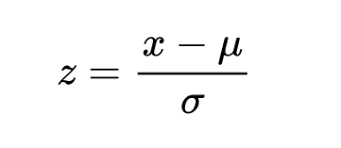

In [ ]:
def StandardScaleData(data)
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


#### MinMaxScaler

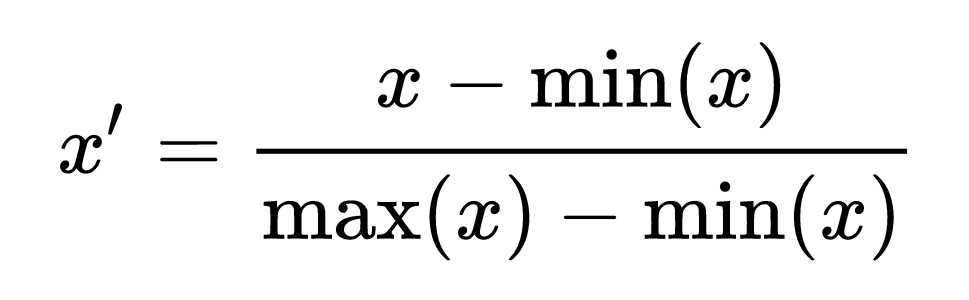

In [ ]:
def MinMaxScaleData(data)
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)





---



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

#dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/Machine_readable_file_mei_march_2022.csv")

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/REM_NREM_O2.csv")



In [ ]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_O2,MedianF_Alpha_O2,MeanF_Alpha_O2,Spectral Edge_Alpha_O2,PeakF_Alpha_O2,MeanP_Beta_O2,MedianF_Beta_O2,MeanF_Beta_O2,Spectral Edge_Beta_O2,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00023,10.61463,18.48195,17.98244,10.73951,0.00034,18.23220,25.84976,28.47220,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00023,10.36488,18.10732,17.48293,10.24000,0.00032,18.10732,26.22439,28.72195,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00025,9.74049,17.35805,16.73366,9.86537,0.00031,17.23317,26.47415,28.84683,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00027,9.49073,17.60780,16.85854,8.11707,0.00033,17.73268,26.47415,28.59707,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00036,9.24098,16.48390,15.98439,8.11707,0.00039,15.98439,24.47610,25.97463,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [ ]:
dataset.shape

(89096, 26)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89096 entries, 0 to 89095
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Stage             89096 non-null  object 
 1   MeanP_Alpha_O2          89096 non-null  float64
 2   MedianF_Alpha_O2        89096 non-null  float64
 3   MeanF_Alpha_O2          89096 non-null  float64
 4   Spectral Edge_Alpha_O2  89096 non-null  float64
 5   PeakF_Alpha_O2          89096 non-null  float64
 6   MeanP_Beta_O2           89096 non-null  float64
 7   MedianF_Beta_O2         89096 non-null  float64
 8   MeanF_Beta_O2           89096 non-null  float64
 9   Spectral Edge_Beta_O2   89096 non-null  float64
 10  PeakF_Beta_O2           89096 non-null  float64
 11  MeanP_Theta_O2          89096 non-null  float64
 12  MedianF_Theta_O2        89096 non-null  float64
 13  MeanF_Theta_O2          89096 non-null  float64
 14  Spectral Edge_Theta_O2  89096 non-null

#Feature Scaling

In [ ]:
dataset.describe()

,MeanP_Alpha_O2,MedianF_Alpha_O2,MeanF_Alpha_O2,Spectral Edge_Alpha_O2,PeakF_Alpha_O2,MeanP_Beta_O2,MedianF_Beta_O2,MeanF_Beta_O2,Spectral Edge_Beta_O2,PeakF_Beta_O2,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
count,8.909600e+04,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,...,8.909600e+04,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.000000,89096.00000,89096.000000
mean,7.468544e-04,8.850398,15.683676,14.924783,9.509146,0.000948,18.012181,28.743072,30.852628,23.174315,...,1.462028e-02,1.430147,6.462812,3.457914,1.139120,0.001363,37.160328,44.632743,50.04934,43.056958
std,5.740618e-03,2.863547,5.419831,5.839452,7.839750,0.005596,15.405297,14.615821,14.946110,20.489747,...,8.398281e-02,3.633923,3.212076,3.511885,3.665482,0.013366,14.232307,11.318757,9.84912,15.695022
min,4.590000e-52,0.124880,0.874150,0.124880,0.124880,0.000000,6.618540,14.860490,14.111220,3.121950,...,2.290000e-40,0.124880,1.498540,0.499510,0.124880,0.000000,15.360000,27.098540,31.96878,5.369760
25%,2.600000e-04,7.992200,13.986340,13.112200,6.993170,0.000210,12.987320,22.478050,23.352200,10.989270,...,1.410000e-03,0.749270,5.494630,2.497560,0.499510,0.000027,28.347320,38.837070,47.95317,32.593170
50%,4.100000e-04,8.741460,14.860490,14.111220,7.992200,0.000330,14.236100,24.226340,25.724880,13.611710,...,2.800000e-03,0.999020,6.119020,3.121950,0.624390,0.000046,33.092680,42.958050,49.95122,49.951220
75%,6.400000e-04,9.490730,16.109270,15.235120,9.365850,0.000520,16.109270,27.847800,31.843900,49.951220,...,6.310000e-03,1.248780,6.868290,3.746340,0.874150,0.000120,49.701460,49.826340,50.07610,49.951220
max,7.751800e-01,49.951220,49.951220,50.076100,50.076100,0.569830,127.875120,127.875120,127.875120,127.875120,...,4.595010e+00,31.968780,31.968780,32.093660,31.968780,0.380020,127.875120,127.875120,127.87512,127.875120


In [ ]:
X,y=sep_XY(dataset,"Sleep_Stage")

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
counter = Counter(y)

In [ ]:
print(counter)

Counter({'NREM': 72631, 'REM': 72631})


#Data separating for target value

we can use both indexing and <i>.iloc</i> funtion to get access into data. But before feedin the data to the model we have to use <i>.values.</i> We can use .iloc when the colunms are too many. And we can use indexing when the target colunm is in the middle.

In [ ]:
var=dataset[["Series_reference","Period","Data_value"]] # call like list elements with column name

In [ ]:
var2=var.values #.values remove the col name and make an numpy array
var2 #gives array

In [ ]:
var_type2= list(dataset.iloc[:0,:])
var_type2

but the problem occures when there are many colunms and the target colunm is in the middle then what to do?

So we will use a generalize function to select the y and x axis

In [ ]:

def sep_XY(dataset,target):
  x_col_name= list(dataset.iloc[:0,:])
  x_col_name.remove(target)
  return (dataset[x_col_name].values),(dataset[target].values)


In [ ]:
X,y=sep_XY(dataset,"STATUS")
print(X)
print(y)

<font color="green">Testing with logistic reg</font>

#data encoding<br>
there could be data in string. so sometime we have to convert that to float

In [ ]:
k=list(dataset["Series_reference"].unique())
print(k)
if type(k[0])==str:
  print("yes")
print(type(k[0]))

In [ ]:
dataset["Series_reference"].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()
dataset["Series_reference"]=encoder.fit_transform(dataset["Series_reference"])

In [ ]:
dataset.head()

make all the string contained colunm encoded

In [ ]:
def encode_engine(dataset):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  col= list(dataset.iloc[:0,:])

  for i in col:
    if type(list(dataset[i].unique())[0])==str:
            dataset[i]=encoder.fit_transform(dataset[i])

  return dataset



In [ ]:
new_dataset=encode_engine(dataset)

In [ ]:
new_dataset.head()

#Data Spliting into training and testing

In [ ]:
X,y=sep_XY(new_dataset,"Series_reference")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.2,random_state=3)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

checking

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(new_dataset.std())

In [ ]:
sc=StandardScaler()
sc.fit(X_train)

In [ ]:
X_train_standardized= sc.transform(X_train)
x_test_stacdardized= sc.transform(X_test)

#Deal with Null value

In [ ]:
dataset.info()

In [ ]:
print(dataset.isnull().sum())

<b><ul>
<li>Deleting the columns with missing data
<li>Deleting the rows with missing data
<li>Filling the missing data with a value – Imputation
<li>Imputation with an additional column
<li>Filling with a Regression Model
</ul></b>

Deleting the columns with missing data

#Data Imbalence handeling

In [ ]:
dataset.Sleep_Stage.value_counts()

NREM    72631
REM     16465
Name: Sleep_Stage, dtype: int64

In [ ]:
nrem,rem=list(dataset.Sleep_Stage.value_counts())

In [ ]:
print("Ratio:",min(nrem,rem)/max(nrem,rem))

Ratio: 0.22669383596535914
